<a href="https://colab.research.google.com/github/TirilaPatricGabriel/ML/blob/main/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# UCB

(array([ 947.,  417.,  338.,  380., 5630.,  180.,  435., 1106.,  352.,
         215.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

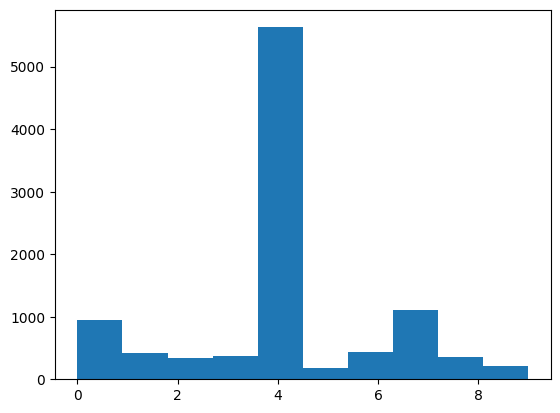

In [27]:
import math

N = 10000
d = 10
n_selected = [0] * d
rewards = [0] * d
ads_selected = []
total_rewards = []

for rnd in range(0, N):

  max_upper_bound = 0
  selected_ad = 0

  for ad in range(0, d):
    if n_selected[ad] == 0:
      upper_bound = float('inf')
    else:
      average_reward = rewards[ad] / n_selected[ad]
      delta_i = math.sqrt(2 * math.log(rnd+1) / n_selected[ad])
      upper_bound = average_reward + delta_i
    if max_upper_bound < upper_bound:
      max_upper_bound = upper_bound
      selected_ad = ad

  reward = dataset.values[rnd][selected_ad]
  n_selected[selected_ad] += 1
  rewards[selected_ad] += reward
  ads_selected.append(selected_ad)
  total_rewards.append(reward if rnd == 0 else total_rewards[-1] + reward)

plt.hist(ads_selected)

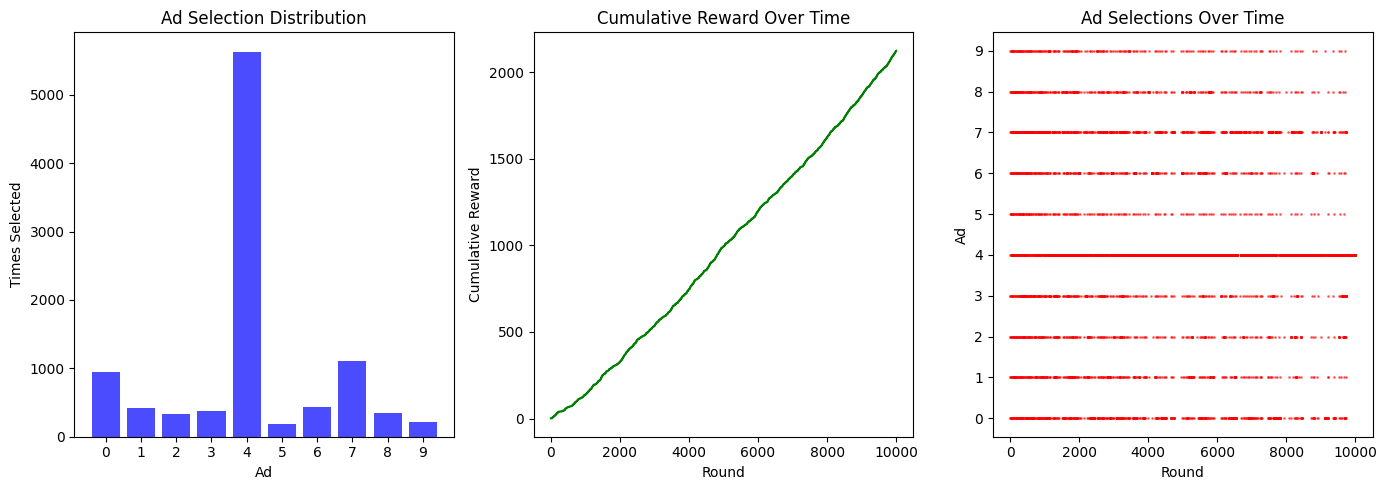

In [28]:
plt.figure(figsize=(14, 5))

# selection frequency
plt.subplot(1, 3, 1)
plt.bar(range(d), n_selected, color='blue', alpha=0.7)
plt.xlabel("Ad")
plt.ylabel("Times Selected")
plt.title("Ad Selection Distribution")
plt.xticks(range(d))

# cumulative reward over time
plt.subplot(1, 3, 2)
plt.plot(total_rewards, color='green')
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time")

# ad selections over time
plt.subplot(1, 3, 3)
plt.scatter(range(N), ads_selected, s=1, alpha=0.5, color='red')
plt.xlabel("Round")
plt.ylabel("Ad")
plt.title("Ad Selections Over Time")
plt.yticks(range(d))

plt.tight_layout()
plt.show()

# Thompson Sampling


(array([ 74.,   1.,  15.,  34.,  27., 179.,  44.,   1.,  25., 100.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

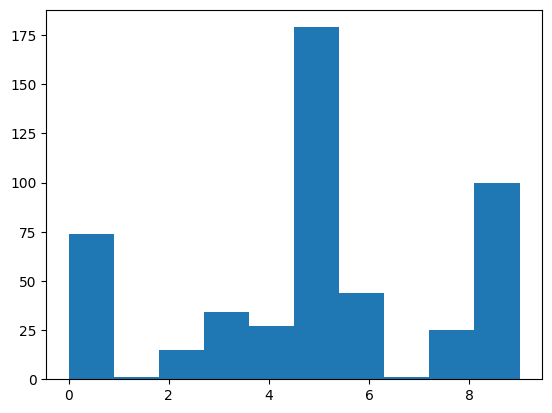

In [31]:
import random

N = 500
d = 10

n_0 = [0] * d
n_1 = [0] * d
ads_selected = []
total_rewards = []

for rnd in range(0, N):

  max_beta = 0
  selected_ad = 0

  for ad in range(0, d):
    random_beta = random.betavariate(n_0[ad]+1, n_1[ad]+1)
    if random_beta > max_beta:
      max_beta = random_beta
      selected_ad = ad

  reward = dataset.values[rnd, selected_ad]
  if reward == 1:
    n_1[selected_ad]+=1
  else:
    n_0[selected_ad]+=1

  ads_selected.append(selected_ad)
  total_rewards.append(reward if rnd == 0 else total_rewards[-1] + reward)

plt.hist(ads_selected)

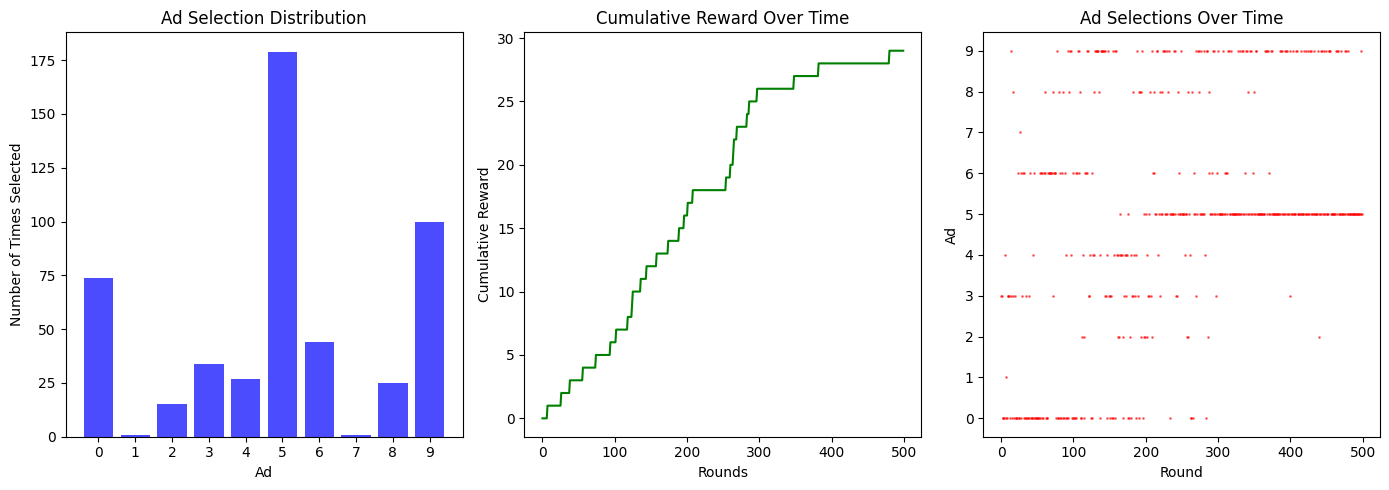

In [32]:
# visualization
plt.figure(figsize=(14, 5))

# ad selection freq
plt.subplot(1, 3, 1)
plt.bar(range(d), [n_0[i] + n_1[i] for i in range(d)], color='blue', alpha=0.7)
plt.xlabel("Ad")
plt.ylabel("Number of Times Selected")
plt.title("Ad Selection Distribution")
plt.xticks(range(d))

# cumulative reward over time
plt.subplot(1, 3, 2)
plt.plot(total_rewards, color='green')
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time")

# ad selections over time
plt.subplot(1, 3, 3)
plt.scatter(range(N), ads_selected, s=1, alpha=0.5, color='red')
plt.xlabel("Round")
plt.ylabel("Ad")
plt.title("Ad Selections Over Time")
plt.yticks(range(d))

plt.tight_layout()
plt.show()